In [1]:
# import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%reload_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../utils/')
from neuralNet import NeuralNet
from search import gridSearchCV
sns.set_style("darkgrid")

from search import ParamGrid

In [2]:
def vectorized_result(j):

    y = np.zeros((10, 1))
    y[j] = 1.0
    return y


data = pd.read_csv('./../data/part1.csv', header=None)

X = np.array(data.iloc[:, :-1])
Y = np.array(data.iloc[:, -1], dtype=np.int32)
n = X.shape[0]
idx = np.arange(0, len(X))
np.random.shuffle(idx)
frac = int(0.8*len(X))
train_x = [np.reshape(x, (-1, 1)) for x in X[idx[:frac]]]
train_y = [vectorized_result(y) for y in Y[idx[:frac]]]
train_data = list(zip(train_x, train_y))
test_x = [np.reshape(x, (-1, 1)) for x in X[idx[frac:]]]
test_y = Y[idx[frac:]]
test_data = list(zip(test_x, test_y))


In [4]:

model = NeuralNet(size=[784, 30,10],
                  cost='cross_entropy_cost', neuron_type='tanh')

train_accuracy, train_cost, test_accuracy, test_cost = model.fit(
    train_data=train_data, epochs=15, mini_batch_size=4, eta=0.5, lmda=1e-2, test_data=test_data, verbose=True)


Epoch :1 complete: test_accuracy: 0.7083333333333334 , train_accuracy :0.7241666666666666
Epoch :2 complete: test_accuracy: 0.82 , train_accuracy :0.8120833333333334
Epoch :3 complete: test_accuracy: 0.8266666666666667 , train_accuracy :0.85625
Epoch :4 complete: test_accuracy: 0.84 , train_accuracy :0.87125
Epoch :5 complete: test_accuracy: 0.8483333333333334 , train_accuracy :0.87125
Epoch :6 complete: test_accuracy: 0.8883333333333333 , train_accuracy :0.9441666666666667
Epoch :7 complete: test_accuracy: 0.9016666666666666 , train_accuracy :0.9429166666666666
Epoch :8 complete: test_accuracy: 0.8766666666666667 , train_accuracy :0.9508333333333333
Epoch :9 complete: test_accuracy: 0.8916666666666667 , train_accuracy :0.9491666666666667
Epoch :10 complete: test_accuracy: 0.9 , train_accuracy :0.9579166666666666
Epoch :11 complete: test_accuracy: 0.91 , train_accuracy :0.9779166666666667
Epoch :12 complete: test_accuracy: 0.92 , train_accuracy :0.9816666666666667
Epoch :13 complete: t

In [13]:
first_layer_ouputs = np.array([model.ith_layer_out(x,2).reshape((28,28)) for x  in test_x])
second_layer_outputs = np.array([model.ith_layer_out(x,1).reshape((6,5)) for x in test_x ])

In [7]:
indices_all=[] # store indices for each digit

for i in range(10):
    indices_all.append(np.where(test_y==i)[0])


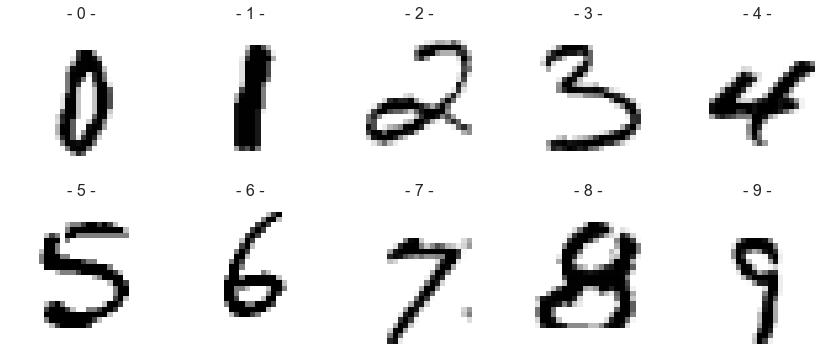

In [74]:
# Plotting first layer output (Input layer)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 10))
fig.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)
for i,ax in zip(np.arange(0,10),np.ravel(axes)):
    ax.set_title('- {} -'.format(i), fontsize=16)
    ax.imshow(first_layer_ouputs[indices_all[i]],cmap=plt.cm.binary)
    ax.axis('off')

# plt.tight_layout(f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95))


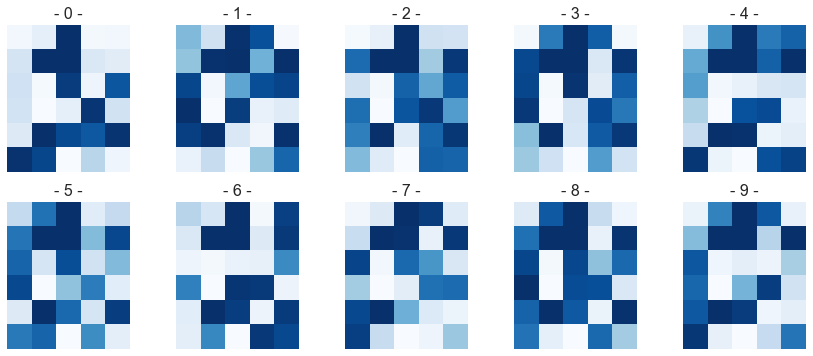

In [14]:
# Plotting first layer output (Input layer)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 10))
fig.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)
for i, ax in zip(np.arange(0, 10), np.ravel(axes)):
    ax.set_title('- {} -'.format(i), fontsize=16)
    ax.imshow(np.sum(second_layer_outputs[indices_all[i]],axis=0),cmap='Blues')
    ax.axis('off')

# plt.tight_layout(f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95))


These patterns look sufficiently random - except for the digits 4 and 9, which look remarkably similar. This makes sense as the hand-written digits themselves strongly resemble each other in the writing style used in the US, on which the MNIST dataset is based.

We quantify the similarities between the normalized static first-hidden layer patterns for pairs of digits by multiplication and summation over these patterns

In [106]:
second_layer_outputs_flatten =  np.array(
    [model.ith_layer_out(x, 1).reshape(-1,) for x in test_x])

second_layer_outputs_flatten.shape


(600, 100)

In [108]:
from itertools import product

In [114]:
similarity_layer = np.zeros((10, 10))

for i ,j in product(np.arange(0,10),np.arange(0,10)):
        sum_i_normalized = np.sqrt(1+(np.sum(second_layer_outputs_flatten[indices_all[i]], axis=0)/np.sum(second_layer_outputs_flatten[indices_all[i]])))
        sum_j_normalized = np.sqrt(1+ (np.sum(second_layer_outputs_flatten[indices_all[j]], axis=0)/np.sum(second_layer_outputs_flatten[indices_all[j]])))
        similarity_layer[i, j] = np.sum(sum_i_normalized*sum_j_normalized)


In [124]:
similarity_layer.shape

(10, 10)

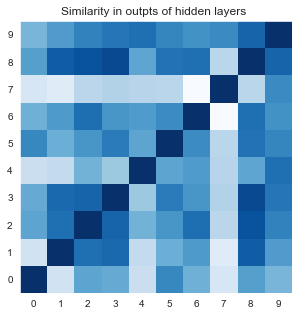

In [131]:
plt.figure(figsize=(10,5))
plt.imshow(similarity_layer,origin='lower',cmap='Blues')
plt.title("Similarity in outpts of hidden layers ")
plt.xticks(np.arange(0,10))
plt.yticks(np.arange(0,10))
plt.grid(False)
plt.show()
